In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, t
from scipy.stats import ttest_ind
# from statannotations.Annotator import Annotator
from scipy import stats
import statsmodels.api as sm
# 字体设置
plt.rcParams['font.sans-serif'] = ['SimHei']    # SimHei黑体，Kaiti楷体，LiSu隶书，FangSong仿宋，YouYuan幼圆，STSong华文宋体
plt.rcParams['axes.unicode_minus'] = False

一、相关系数

In [2]:
# 从 Excel 文件中读取数据 注意路径
df = pd.read_excel('girl.xlsx') # 有可能依赖openxyl
# 显示 DataFrame 的前几行数据
print(df.head())
# 将数据集转换为 DataFrame
df1 = pd.DataFrame(df)
# 使用 describe() 函数计算描述性统计信息
statistics = df1.describe(include='all')
# 打印结果
print(statistics)

    身高  体重   肺活量  50米跑  立定跳远  坐位体前屈
0  155  51  1687   9.7   158    9.3
1  158  52  1868   9.3   162    9.6
2  160  59  1958   9.9   178    9.5
3  163  59  1756   9.7   183   10.1
4  165  60  1575   9.0   156   10.4
               身高          体重          肺活量        50米跑        立定跳远       坐位体前屈
count  591.000000  591.000000   591.000000  591.000000  591.000000  591.000000
mean   156.003384   46.783418  2333.233503   10.792014  166.825719    9.496616
std      7.389410    5.031473   350.436154    1.310873   16.813587    2.938186
min    135.000000   16.000000  1450.000000    7.800000   52.000000    0.500000
25%    151.000000   44.000000  2109.000000    9.800000  156.000000    7.800000
50%    157.000000   47.000000  2391.000000   10.700000  167.000000    9.600000
75%    161.000000   50.000000  2570.000000   11.500000  178.000000   11.600000
max    171.000000   65.000000  3272.000000   15.000000  205.000000   17.500000


In [3]:
a = df1.max()  # 最大值
b = df1.min()  # 最小值
d = df1.var()  # 方差
e = df1.std()  # 标准差
f = df1.mean() / df1.std()  # 变异系数
print('最大值：', a, '\n', '最小值：', b, '\n', '方差：', round(d, 2), '标准差：', round(e, 2), '\n','变异系数：', round(f, 2))

最大值： 身高        171.0
体重         65.0
肺活量      3272.0
50米跑       15.0
立定跳远      205.0
坐位体前屈      17.5
dtype: float64 
 最小值： 身高        135.0
体重         16.0
肺活量      1450.0
50米跑        7.8
立定跳远       52.0
坐位体前屈       0.5
dtype: float64 
 方差： 身高           54.60
体重           25.32
肺活量      122805.50
50米跑          1.72
立定跳远        282.70
坐位体前屈         8.63
dtype: float64 标准差： 身高         7.39
体重         5.03
肺活量      350.44
50米跑       1.31
立定跳远      16.81
坐位体前屈      2.94
dtype: float64 
 变异系数： 身高       21.11
体重        9.30
肺活量       6.66
50米跑      8.23
立定跳远      9.92
坐位体前屈     3.23
dtype: float64


In [4]:
# 相关系数和协方差
# 计算数据集中各列之间的协方差
covariance_matrix = df1.cov(ddof=1) ## 参数ddof=1，表示结果除以N-1
# 打印协方差矩阵
display(covariance_matrix)

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
身高,54.603378,2.473616,-563.641470,-1.859837,5.463303,2.064079
体重,2.473616,25.315725,168.165912,0.452064,2.363885,-0.237853
肺活量,-563.641470,168.165912,122805.497927,133.105122,146.284832,-77.152429
50米跑,-1.859837,0.452064,133.105122,1.718388,-1.293360,-0.007227
立定跳远,5.463303,2.363885,146.284832,-1.293360,282.696693,-0.859913
坐位体前屈,2.064079,-0.237853,-77.152429,-0.007227,-0.859913,8.632938


In [5]:
# 计算数据集中各列之间的相关系数
correlation_matrix = df1.corr()
# 打印相关系数矩阵
display(correlation_matrix)

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
身高,1.000000,0.066531,-0.217663,-0.192002,0.043973,0.095069
体重,0.066531,1.000000,0.095375,0.068540,0.027943,-0.016089
肺活量,-0.217663,0.095375,1.000000,0.289751,0.024827,-0.074931
50米跑,-0.192002,0.068540,0.289751,1.000000,-0.058681,-0.001876
立定跳远,0.043973,0.027943,0.024827,-0.058681,1.000000,-0.017407
坐位体前屈,0.095069,-0.016089,-0.074931,-0.001876,-0.017407,1.000000


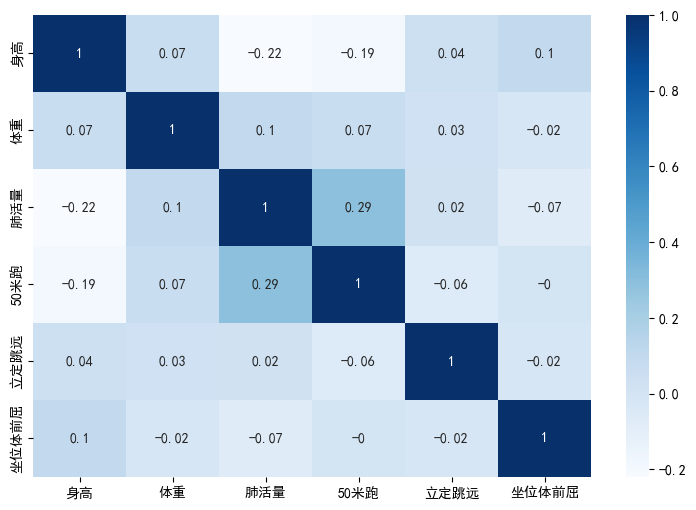

In [6]:
# 绘制热力图
plt.figure(figsize=(9, 6), dpi=100)
# sns.set(font='Times New Roman')
sns.heatmap(df.corr().round(2), annot=True, cmap='Blues')
plt.show()

二、散点矩阵

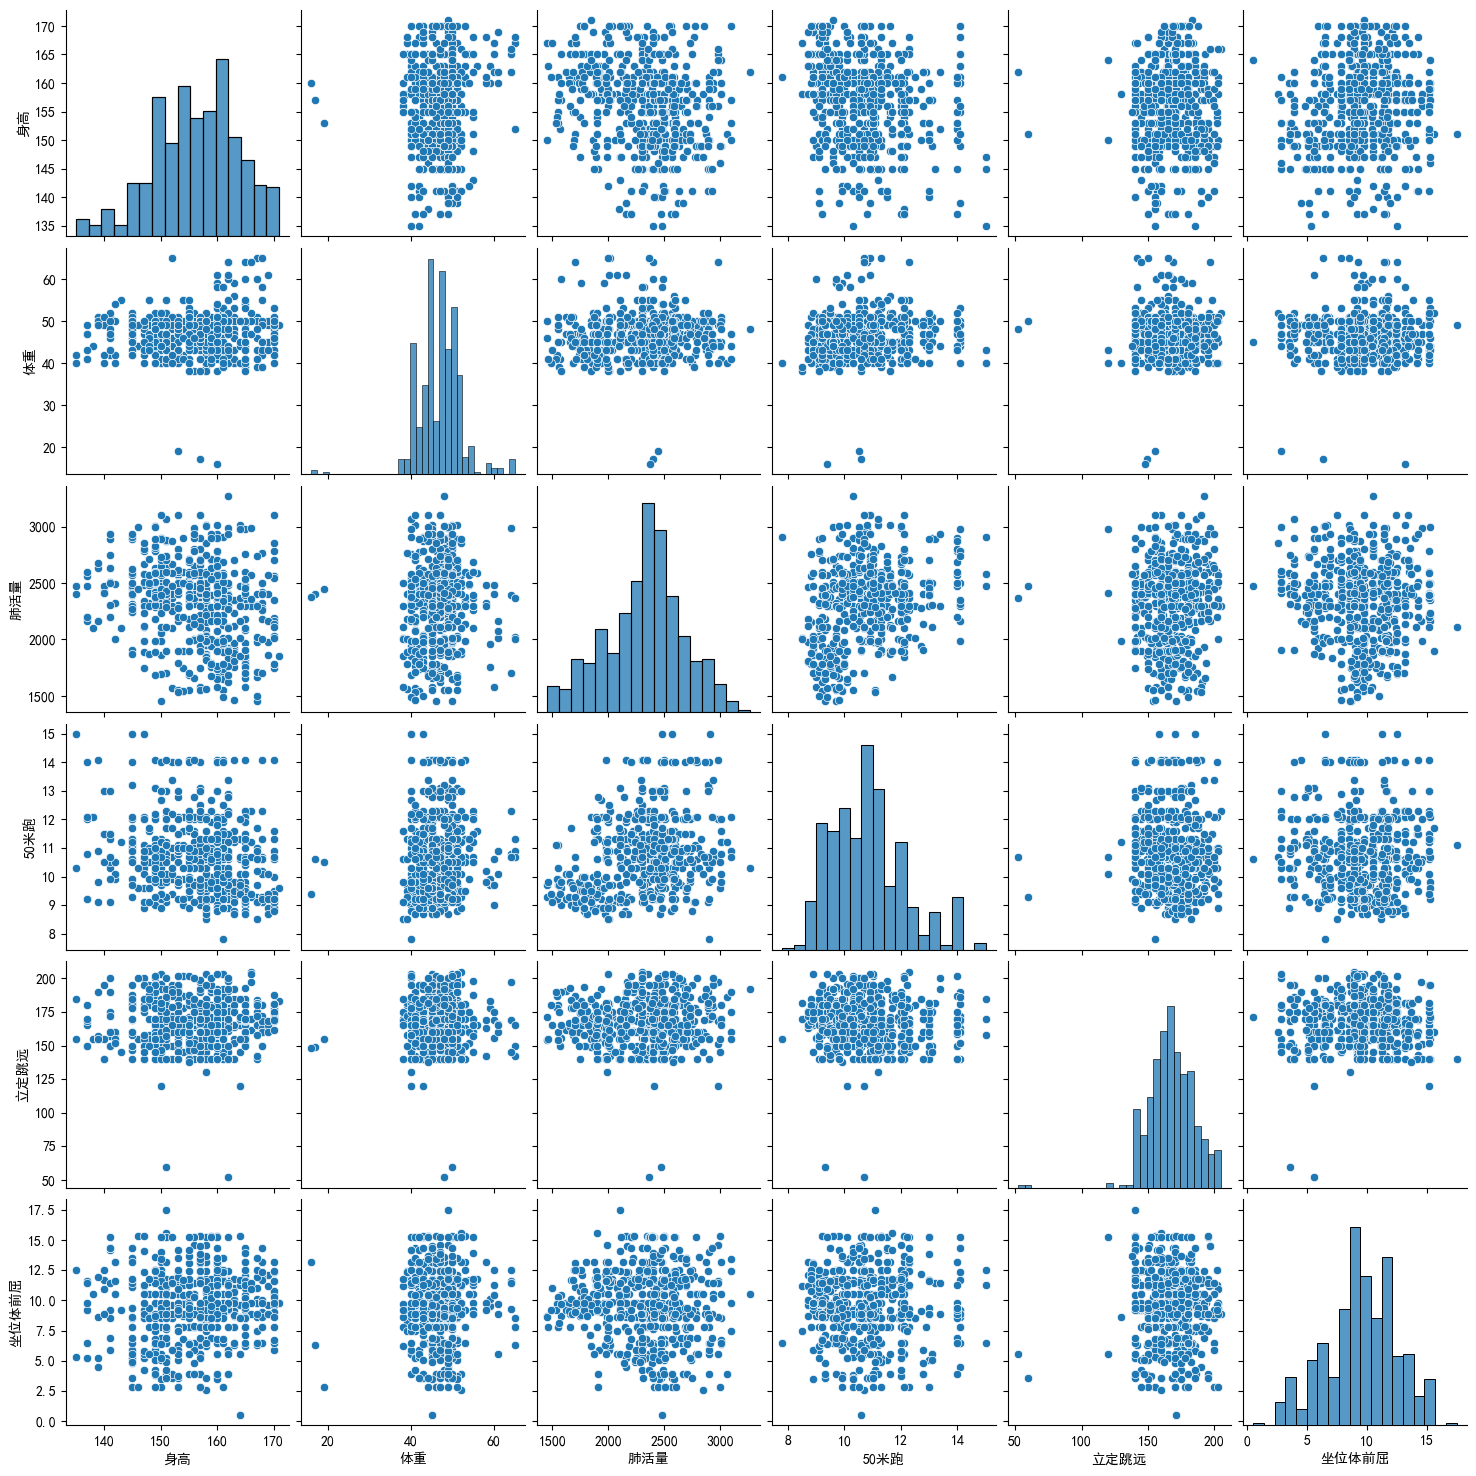

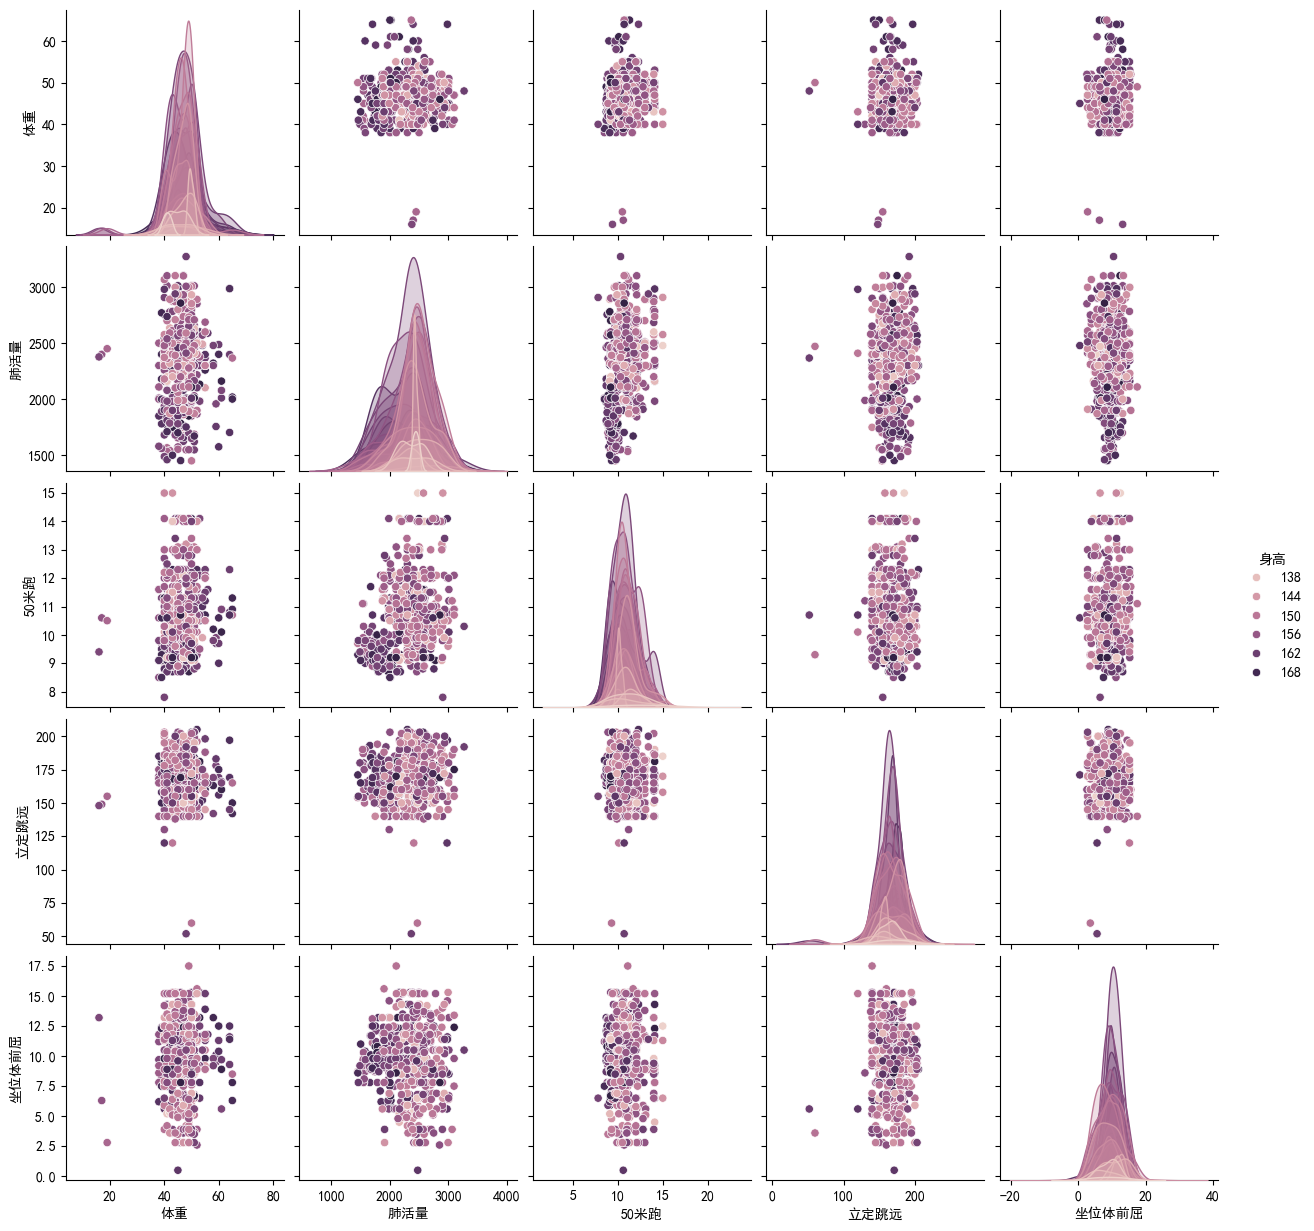

In [7]:
# 从 Excel 文件中读取数据 注意路径
df = pd.read_excel('girl.xlsx')  # 有可能依赖openxyl
# 将数据集转换为 DataFrame
df1 = pd.DataFrame(df)
# df2 = df1.transpose() # 转置后才符合pairplot的格式要求
# print(df2)
# 使用seaborn的pairplot函数绘制散点图矩阵
sns.pairplot(df1) # https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn-pairplot
sns.pairplot(df1, hue="身高")

plt.show()

三、手动t检验

In [8]:
# 从 Excel 文件中读取数据 注意路径
df = pd.read_excel('girl.xlsx')  # 有可能依赖openxyl
df1 = pd.DataFrame(df)
# 假设前两组数据有相关性
x = df1.iloc[:, 0]  # 第一列
y = df1.iloc[:, 1]  # 第二列
# 计算皮尔逊相关系数和 p 值
pearson_corr, p_value = pearsonr(x,y)
# 设置显著性水平
alpha = 0.05
# 计算自由度
n = len(x)
df = n - 2
# 计算 t 统计量
t_statistic = pearson_corr * np.sqrt(df / (1 - pearson_corr ** 2))
# 计算 t 分布的临界值
t_critical = t.ppf(1 - alpha / 2, df)
# 输出结果
print("皮尔逊相关系数:", pearson_corr)
print("p-值:", p_value)
print("t-statistic:", t_statistic)
print("t-critical:", t_critical)

# 进行假设检验
if np.abs(t_statistic) > t_critical:
    print("拒绝无效的假设，变量之间存在显著的线性关系。（看清楚你的原假设是什么，别搞反了）")
else:
    print("未能拒绝无效假设，变量之间没有显著的线性关系。（看清楚你的原假设是什么，别搞反了）")



皮尔逊相关系数: 0.0665314917894216
p-值: 0.10614197026621612
t-statistic: 1.6182597471616478
t-critical: 1.9639997580941102
未能拒绝无效假设，变量之间没有显著的线性关系。（看清楚你的原假设是什么，别搞反了）


In [9]:
df1 = pd.read_excel('girl.xlsx')  # 有可能依赖openxyl
df = pd.DataFrame(df1)

    # 进行显著性检验
p_values = pd.DataFrame(index=df.columns, columns=df.columns)

for i in df.columns:
    for j in df.columns:
        _, p_value = stats.pearsonr(df[i], df[j])
        p_values.loc[i, j] = p_value

    # 显示显著性P值矩阵
print(p_values)

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    else:
        return "ns"  # 不显著


    # 将P值转换为显著性星号
significance_asterisks = p_values.applymap(convert_pvalue_to_asterisks)

    # 打印带有显著性星号的相关系数矩阵
print(significance_asterisks)



             身高        体重       肺活量      50米跑      立定跳远     坐位体前屈
身高          0.0  0.106142       0.0  0.000003  0.285856  0.020805
体重     0.106142       0.0  0.020396  0.095978  0.497772   0.69629
肺活量         0.0  0.020396       0.0       0.0  0.546921  0.068712
50米跑   0.000003  0.095978       0.0       0.0  0.154222  0.963693
立定跳远   0.285856  0.497772  0.546921  0.154222       0.0  0.672806
坐位体前屈  0.020805   0.69629  0.068712  0.963693  0.672806       0.0
         身高    体重   肺活量  50米跑  立定跳远 坐位体前屈
身高     ****    ns  ****  ****    ns     *
体重       ns  ****     *    ns    ns    ns
肺活量    ****     *  ****  ****    ns    ns
50米跑   ****    ns  ****  ****    ns    ns
立定跳远     ns    ns    ns    ns  ****    ns
坐位体前屈     *    ns    ns    ns    ns  ****


C:\Users\zjw17\AppData\Local\Temp\ipykernel_10404\4507053.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  significance_asterisks = p_values.applymap(convert_pvalue_to_asterisks)
